In [769]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Selamat datang di tahun 2912, di mana keterampilan data sains Anda dibutuhkan untuk memecahkan misteri kosmik. Kami menerima transmisi dari empat tahun cahaya jauhnya dan situasinya tidak terlihat baik.

Spaceship Titanic adalah kapal penumpang antarbintang yang diluncurkan sebulan yang lalu. Dengan hampir 13.000 penumpang di dalamnya, kapal tersebut memulai perjalanan perdananya mengangkut emigran dari tata surya kita ke tiga eksoplanet baru yang layak huni yang mengorbit bintang terdekat.

Saat melewati Alpha Centauri dalam perjalanan menuju tujuan pertamanya—planet 55 Cancri E yang panas—Spaceship Titanic yang tidak waspada bertabrakan dengan anomali ruang-waktu yang tersembunyi dalam awan debu. Sayangnya, nasibnya serupa dengan Titanic yang bernama sama 1000 tahun sebelumnya. Meskipun kapal tetap utuh, hampir setengah dari penumpang dipindahkan ke dimensi lain!

## Load Dataset

In [770]:
train_df = pd.read_csv("./train.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Assessing and Explanatory

In [771]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [772]:
# feature column
columns = train_df.columns.to_list()

| Kolom         | Deskripsi                                                                                              |
|---------------|--------------------------------------------------------------------------------------------------------|
| PassengerId   | ID unik untuk setiap penumpang. Setiap ID berbentuk gggg_pp di mana gggg menunjukkan grup yang bepergian bersama penumpang tersebut dan pp adalah nomor mereka dalam grup. Orang-orang dalam grup seringkali adalah anggota keluarga, tetapi tidak selalu. |
| HomePlanet    | Planet asal tempat penumpang berangkat, biasanya planet tempat tinggal permanen mereka.                |
| CryoSleep     | Menunjukkan apakah penumpang memilih untuk ditempatkan dalam animasi suspensi selama perjalanan. Penumpang yang berada dalam cryosleep dikurung di kabin mereka. |
| Cabin         | Nomor kabin tempat penumpang menginap. Berbentuk deck/num/side, di mana side dapat berupa P untuk Port atau S untuk Starboard. |
| Destination   | Planet tujuan tempat penumpang akan turun.                                                             |
| Age           | Usia penumpang.                                                                                        |
| VIP           | Apakah penumpang telah membayar layanan VIP khusus selama perjalanan.                                   |
| RoomService   | Jumlah yang ditagihkan penumpang di layanan kamar Spaceship Titanic.                                   |
| FoodCourt     | Jumlah yang ditagihkan penumpang di area makanan Spaceship Titanic.                                    |
| ShoppingMall  | Jumlah yang ditagihkan penumpang di pusat perbelanjaan Spaceship Titanic.                              |
| Spa           | Jumlah yang ditagihkan penumpang di spa Spaceship Titanic.                                             |
| VRDeck        | Jumlah yang ditagihkan penumpang di dek VR Spaceship Titanic.                                          |
| Name          | Nama depan dan nama belakang penumpang.                                                                |
| Transported   | Apakah penumpang dipindahkan ke dimensi lain. Ini adalah target, kolom yang ingin Anda prediksi.       |

In [773]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [774]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [775]:
# Count Duplicate Data
train_df.duplicated().sum()

0

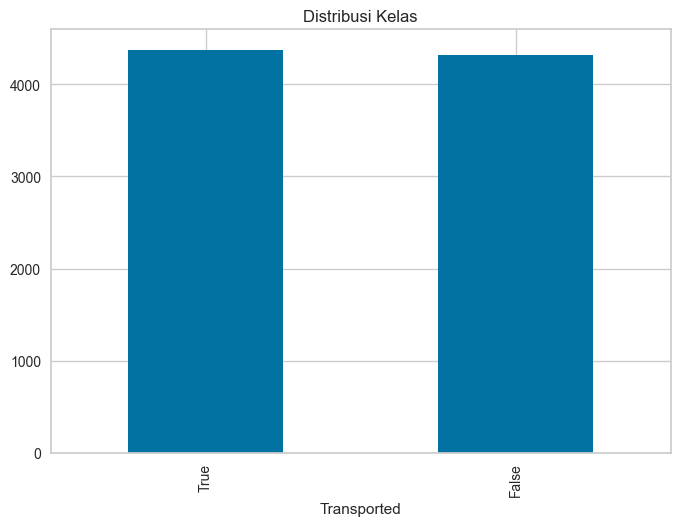

In [776]:
# Distribusi Kelas
train_df['Transported'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas")
plt.show()

Label sangat seimbang dan aman untuk digunakan lebih lanjut tanpa melakukan proses oversampling

In [777]:
# Unique Value
for i in columns:
    print(f"{i} : {len(train_df[i].unique())}")

PassengerId : 8693
HomePlanet : 4
CryoSleep : 3
Cabin : 6561
Destination : 4
Age : 81
VIP : 3
RoomService : 1274
FoodCourt : 1508
ShoppingMall : 1116
Spa : 1328
VRDeck : 1307
Name : 8474
Transported : 2


## Bivariate Analysis

In [778]:
# All Feature
print(train_df.columns.to_list())

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


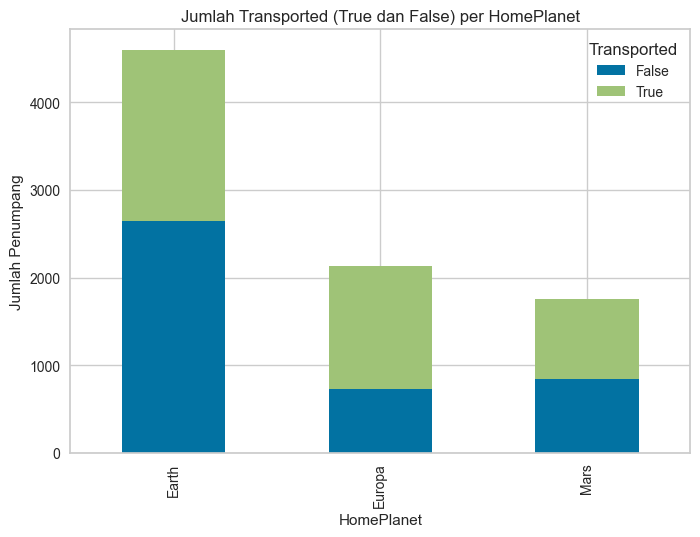

In [779]:
# Menghitung jumlah Transported True dan False untuk setiap nilai HomePlanet
transported_counts = train_df.groupby(['HomePlanet', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='HomePlanet', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Distribusi True dan False dari kedua label pada fitur HomePlanet dapat dilihat hampir seimbang untuk setiap nilai

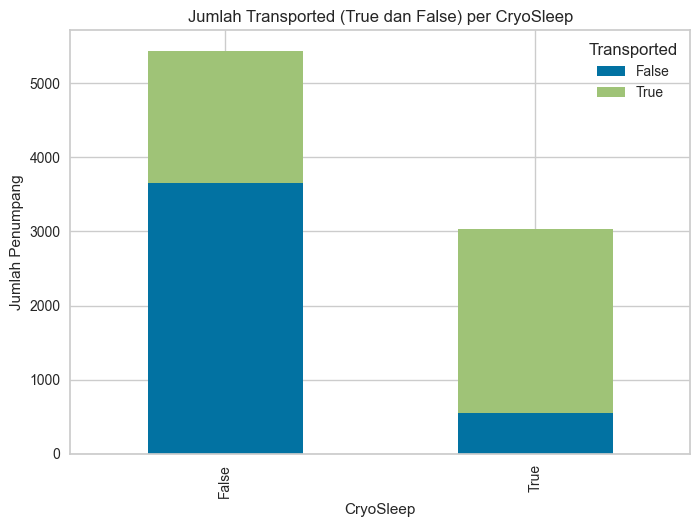

In [780]:
# Menghitung jumlah Transported True dan False untuk setiap nilai CryoSleep
transported_counts = train_df.groupby(['CryoSleep', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='CryoSleep', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Penumpang yang Cycrosleep memilih pengaruh lebih tinggi daripada yang False, bisa dirubah ke Label Encoder

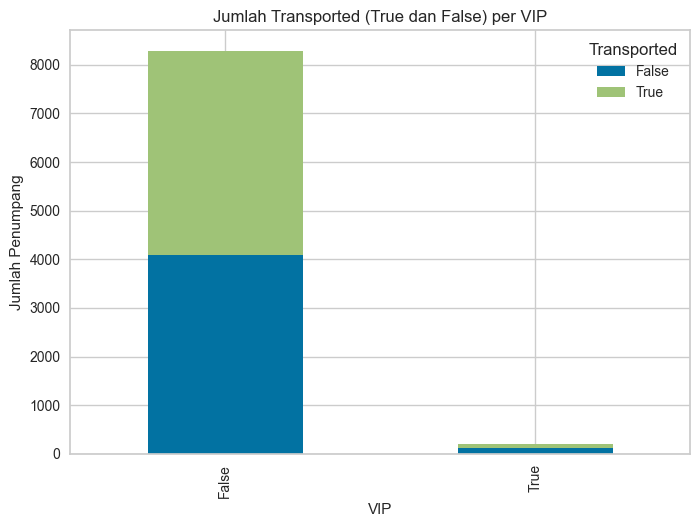

In [781]:
# Menghitung jumlah Transported True dan False untuk setiap nilai VIP
transported_counts = train_df.groupby(['VIP', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='VIP', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per VIP')
plt.xlabel('VIP')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

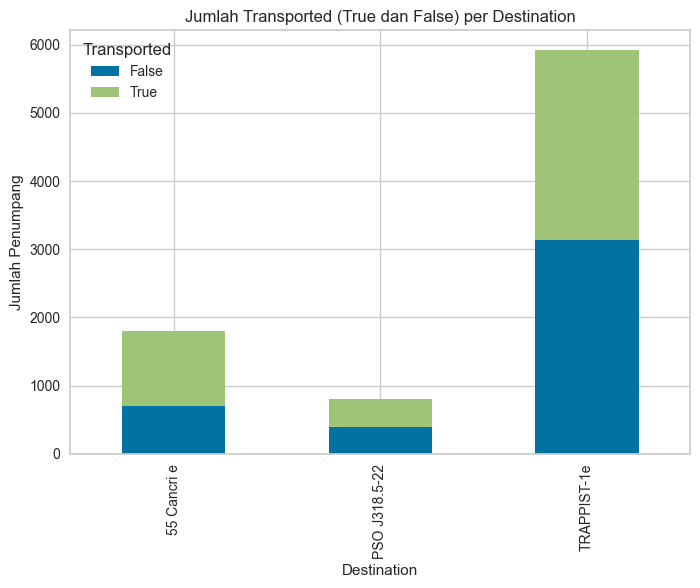

In [782]:
# Menghitung jumlah Transported True dan False untuk setiap nilai Destination
transported_counts = train_df.groupby(['Destination', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='Destination', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per Destination')
plt.xlabel('Destination')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Distribusi True dan False dari kedua label pada fitur Destination dapat dilihat hampir seimbang untuk setiap nilai

#### Cycrosleep Analysis Analysis

In [783]:
CaryoSleepPassenger = train_df[train_df['CryoSleep'] == True]
# Unique Value
for i in columns:
    print(f"{i} : {len(CaryoSleepPassenger[i].unique())}")

PassengerId : 3037
HomePlanet : 4
CryoSleep : 1
Cabin : 2438
Destination : 4
Age : 79
VIP : 3
RoomService : 2
FoodCourt : 2
ShoppingMall : 2
Spa : 2
VRDeck : 2
Name : 2974
Transported : 2


Dapat disimpulkan bahwa apabila Cycrosleep bernilai true maka tagihan akan bernilai 0.

In [784]:
# Kolom yang ingin diisi
columns_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Mengisi NaN di kolom tertentu dengan 0 jika CryoSleep bernilai True
train_df.loc[train_df['CryoSleep'] == True, columns_to_fill] = train_df.loc[train_df['CryoSleep'] == True, columns_to_fill].fillna(0)

# Mengisi NaN di kolom tertentu dengan median jika CryoSleep bernilai False
for column in columns_to_fill:
    median_value = train_df[column].median()
    train_df.loc[train_df['CryoSleep'] == False, column] = train_df.loc[train_df['CryoSleep'] == False, column].fillna(median_value)

#### Analysis Transported

In [785]:
transported_passanger = train_df[train_df['Transported'] == True]
non_transported_passanger = train_df[train_df['Transported'] == False]

In [786]:
transported_passanger.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True


In [787]:
non_transported_passanger.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
13,0010_01,Earth,False,G/1/S,TRAPPIST-1e,48.0,False,719.0,1.0,65.0,0.0,24.0,Reney Baketton,False
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False


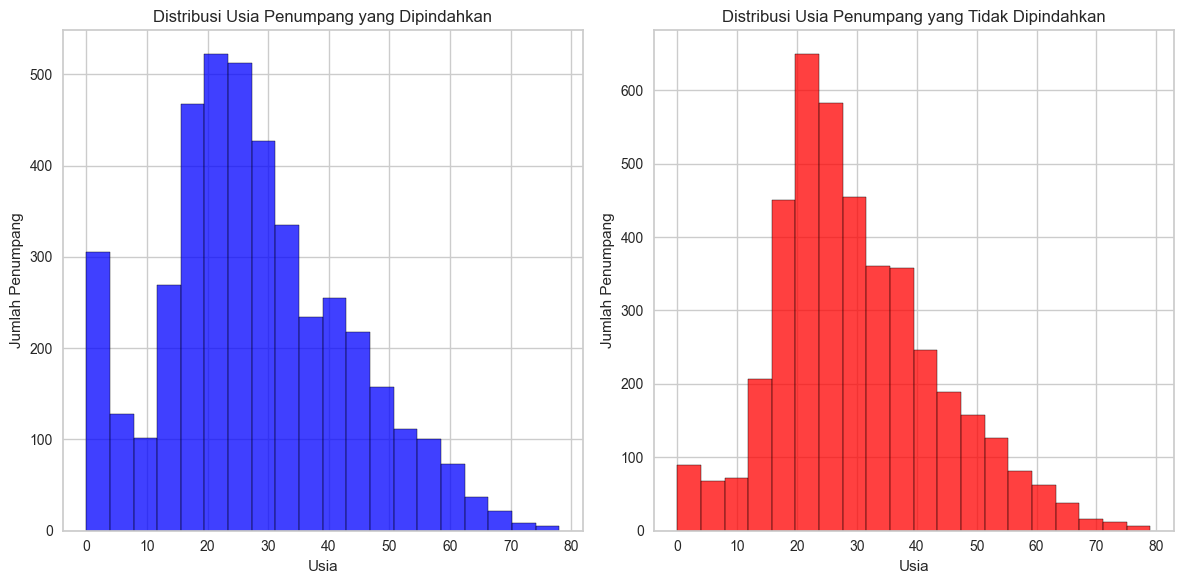

In [788]:
# Membuat histogram
plt.figure(figsize=(12, 6))

# Histogram untuk penumpang yang 'Transported'
plt.subplot(1, 2, 1)
sns.histplot(transported_passanger['Age'].dropna(), bins=20, kde=False, color='blue')
plt.title('Distribusi Usia Penumpang yang Dipindahkan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

# Histogram untuk penumpang yang 'Not Transported'
plt.subplot(1, 2, 2)
sns.histplot(non_transported_passanger['Age'].dropna(), bins=20, kde=False, color='red')
plt.title('Distribusi Usia Penumpang yang Tidak Dipindahkan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.tight_layout()
plt.show()

Penumpang dengan usia muda 0 - 12 lebih mudah dipindahkan

## Feature Engineering & Fill Null Value

In [789]:
print(columns)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


In [790]:
# Group 
train_df['group'] = train_df['PassengerId'].apply(lambda x : x[:4])

In [791]:
# Bill Amount Mean
train_df['TotalSpendingMean'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=1)
train_df['TotalSpending'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
train_df['TotalSpendingMedian'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median(axis=1)

In [792]:
# Fill Cycrosleep jadi True jika Total Spending adalah 0
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['TotalSpending'].apply(lambda x: x == 0))

# Kolom yang ingin diisi
columns_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Mengisi NaN di kolom tertentu dengan 0 jika CryoSleep bernilai True
train_df.loc[train_df['CryoSleep'] == True, columns_to_fill] = train_df.loc[train_df['CryoSleep'] == True, columns_to_fill].fillna(0)

# Mengisi NaN di kolom tertentu dengan median jika CryoSleep bernilai False
for column in columns_to_fill:
    median_value = train_df[column].median()
    train_df.loc[train_df['CryoSleep'] == False, column] = train_df.loc[train_df['CryoSleep'] == False, column].fillna(median_value)

In [793]:
# Mengelompokkan berdasarkan 'group' dan memfilter yang nilai 'group'-nya lebih dari satu dan urutkan
group_analysis = train_df.groupby('group').filter(lambda x: len(x) > 1).sort_values(by=['group','PassengerId','Name'])

In [794]:
# Fill NaN Value (diisi berdasarkan nama keluarga dari group dia berada) hasil pengurutan di atas (keluarga biasanya idnya urut)
group_analysis['Name'].bfill(inplace=True)

In [795]:
# Add 'Family Name' column
group_analysis['Family Name'] = group_analysis['Name'].apply(lambda x: x.split()[1] if pd.notna(x) else np.nan)

In [796]:
# Mengisi nilai NaN pada Cabin berdasarkan Family Name
group_analysis['Cabin'] = group_analysis.groupby('Family Name')['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

### JOIN TO TRAIN DATA

In [797]:
# Update data lama dengan data baru
train_df.update(group_analysis)

In [798]:
# Add 'Family Name' column
train_df['Family Name'] = train_df['Name'].apply(lambda x: x.split()[1] if pd.notna(x) else np.nan)

In [799]:
train_df['Name'].fillna(train_df['Family Name'].mode()[0], inplace=True)

In [800]:
train_df['']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,TotalSpendingMean,TotalSpending,TotalSpendingMedian,Family Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,0.0,0.0,0.0,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,147.2,736.0,44.0,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2076.6,10383.0,49.0,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,1035.2,5176.0,371.0,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,218.2,1091.0,151.0,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1707.2,8536.0,74.0,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,0.0,0.0,0.0,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,374.6,1873.0,0.0,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,927.4,4637.0,353.0,Hontichre


In [801]:
# Add 'Family Name' column with the updated condition
train_df['Family Name'] = train_df['Name'].apply(lambda x: x.split()[1] if pd.notna(x) and len(x.split()) > 1 else (x.split()[0] if pd.notna(x) else np.nan))

Analisis nama keluarga dan group yang sama menunjukkan bahwa nama keluarga, total spending, dan umur sangat berpengaruh menentukkan tansported atau tidaknya. Namun perlu diingat bahwa nama keluarga belum tentu keluarga jadi bisa dikombinasikan antara group + nama keluarga

In [802]:
# Menggabungkan kolom 'Family Name' dan 'group' dengan tanda pemisah '-'
train_df['Related Family'] = train_df['Family Name'] + '-' + train_df['group']

In [803]:
# Mengisi nilai NaN pada Cabin berdasarkan Family Name
train_df['Cabin'] = train_df.groupby('Family Name')['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [804]:
train_df.isnull().sum()

PassengerId              0
HomePlanet             201
CryoSleep                0
Cabin                    9
Destination            182
Age                    179
VIP                    203
RoomService              0
FoodCourt                0
ShoppingMall             0
Spa                      0
VRDeck                   0
Name                     0
Transported              0
group                    0
TotalSpendingMean        0
TotalSpending            0
TotalSpendingMedian      0
Family Name              0
Related Family           0
dtype: int64

In [864]:
# Ekstrak fitur dari 'Cabin'
train_df[['CabinDeck', 'CabinNumber', 'CabinSide']] = train_df['Cabin'].str.split('/', expand=True)
train_df['CabinNumber'] = pd.to_numeric(train_df['CabinNumber'], errors='coerce')  # Konversi ke numerik

### FILL VIP NAN

In [806]:
# Mengisi nilai NaN pada kolom VIP dengan False jika Age < 18 atau Age > 75 dan yang berasal dari Bumi
train_df.loc[(train_df['VIP'].isna()) & ((train_df['Age'] < 18) | (train_df['Age'] > 75)), 'VIP'] = False
train_df.loc[(train_df['VIP'].isna()) & (train_df['HomePlanet'] == 'Earth'), 'VIP'] = False

In [807]:
train_df_copy = train_df.sort_values(by='Destination')

Analisis hasil kabin adalah semua cabinDeck sebelum D dari planet Europa.

In [808]:
VIP = train_df_copy[train_df_copy['VIP'] == True]

## Analisis Per Planet Home

In [809]:
Europa = train_df_copy[train_df_copy['HomePlanet'] == 'Europa']
Earth = train_df_copy[train_df_copy['HomePlanet'] == 'Earth']
Mars = train_df_copy[train_df_copy['HomePlanet'] == 'Mars']


List Mayoritas asal planet dan kabin:
- CabinDeck	 C ke atas itu Europa semua
- CabCabinDeck	in G F kasih earth
- CabinDeck	 F D kasih mars

Pemberian di atas berdasarkan persentase tersebesar persebaran kabin ke planet

In [810]:
# Aturan pengisian
def fill_homeplanet(row):
    if pd.isna(row['HomePlanet']):
        if row['CabinDeck'] in ['C', 'B', 'A']:  # C ke atas itu Europa
            return 'Europa'
        elif row['CabinDeck'] in ['G', 'F']:     # G F kasih Earth
            return 'Earth'
        elif row['CabinDeck'] in ['F', 'D', 'E']:     # F D E kasih Mars
            return 'Mars'
    return row['HomePlanet']

# Menerapkan fungsi pengisian
train_df['HomePlanet'] = train_df.apply(fill_homeplanet, axis=1)

### ANALISIS PLANET DESINATION

In [811]:
TRAPPIST = train_df_copy[train_df_copy['Destination'] == 'TRAPPIST-1e']
Cancri = train_df_copy[train_df_copy['Destination'] == '55 Cancri e']
PSO = train_df_copy[train_df_copy['Destination'] == 'PSO J318.5-22']

In [812]:
train_df.loc[(train_df['Destination'].isna()) & (train_df['HomePlanet'] == 'Mars'), 'Destination'] = 'TRAPPIST-1e'

### ANALYSIS AGE

In [813]:
import numpy as np

In [814]:
train_df['Age'] = train_df['Age'].fillna(-1).astype(int)
sort_age = train_df.sort_values(by='Age')

Hasil analisisnya adalah apabila pengeluaran adalah 0 maka sudah dipastikan bahwa umur itu di awah 12 tahun sehingga pendekatan bagus untuk mengisi umur dengan kondisi tersebut dengan nilai tengah 0 - 12

In [815]:
train_df.loc[(train_df['Age'].isna()) & (train_df['TotalSpending'] == 0)] = 6

In [816]:
train_df.loc[train_df['Age'] == -1, 'Age'] = np.nan

In [817]:
# Unique Value
for i in train_df.columns.to_list():
    print(f"{i} : {len(train_df[i].unique())}")

PassengerId : 8693
HomePlanet : 4
CryoSleep : 2
Cabin : 6561
Destination : 4
Age : 81
VIP : 3
RoomService : 1273
FoodCourt : 1507
ShoppingMall : 1115
Spa : 1327
VRDeck : 1306
Name : 8474
Transported : 2
group : 6217
TotalSpendingMean : 2340
TotalSpending : 2336
TotalSpendingMedian : 667
Family Name : 2217
Related Family : 6522
CabinDeck : 9
CabinNumber : 1818
CabinSide : 3


In [818]:
train_df.isnull().sum()

PassengerId              0
HomePlanet               1
CryoSleep                0
Cabin                    9
Destination            140
Age                    179
VIP                     76
RoomService              0
FoodCourt                0
ShoppingMall             0
Spa                      0
VRDeck                   0
Name                     0
Transported              0
group                    0
TotalSpendingMean        0
TotalSpending            0
TotalSpendingMedian      0
Family Name              0
Related Family           0
CabinDeck                9
CabinNumber              9
CabinSide                9
dtype: int64

In [819]:
# Mengisi nilai NaN dengan modus untuk kolom 'Destination', 'HomePlanet', dan 'VIP'
train_df['Destination'].fillna(train_df['Destination'].mode()[0], inplace=True)
train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0], inplace=True)
train_df['VIP'].fillna(train_df['VIP'].mode()[0], inplace=True)
train_df['Age'].fillna(train_df['Age'].mode()[0], inplace=True)
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)
# Menghapus baris yang memiliki nilai NaN di kolom 'Cabin'

In [868]:
# Kategorikan 'Age'
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[-1, 17, 65, 100], labels=['Child', 'Adult', 'Senior'])

## Bivariate Analysis 2

Tidak ada cara lagi untuk mengetahui nama sehingga lebih baik didrop saja seharusnya tetapi fitur related name sangat berpengaruh jadi kita isikan modus family name. Menggunakan modus family name juga bagus untuk mengisi deck.

In [820]:
train_df = train_df.sort_values(by='PassengerId')

In [821]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,group,TotalSpendingMean,TotalSpending,TotalSpendingMedian,Family Name,Related Family,CabinDeck,CabinNumber,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,0.0,0.0,0.0,Ofracculy,Ofracculy-0001,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,147.2,736.0,44.0,Vines,Vines-0002,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,2076.6,10383.0,49.0,Susent,Susent-0003,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,1035.2,5176.0,371.0,Susent,Susent-0003,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,218.2,1091.0,151.0,Santantines,Santantines-0004,F,1.0,S


### VIP ANALYSIS

In [822]:
pessangeVIP = train_df[train_df['VIP'] == True].sort_values(by='group')
pessangeVIP.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,group,TotalSpendingMean,TotalSpending,TotalSpendingMedian,Family Name,Related Family,CabinDeck,CabinNumber,CabinSide
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,2076.6,10383.0,49.0,Susent,Susent-0003,A,0.0,S
108,0112_01,Europa,False,B/1/S,55 Cancri e,48.0,True,0.0,2537.0,87.0,...,True,0112,530.8,2654.0,17.0,Cowtale,Cowtale-0112,B,1.0,S
120,0128_01,Mars,False,D/3/S,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,...,False,0128,602.8,3014.0,316.0,Fles,Fles-0128,D,3.0,S
214,0224_01,Mars,False,F/42/S,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,...,False,0224,364.0,1820.0,5.0,Queen,Queen-0224,F,42.0,S
291,0321_01,Earth,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,...,False,0321,245.4,1227.0,0.0,Bache,Bache-0321,F,61.0,S


Analisis VIP True menunjukkan bahwa umur di bawah 18 tahun tidak bisa menjadi VIP sehingga bisa diisi nilai VIP dengan false apabila umur kurang dari 18 dan tidak ada VIP yang berasal dari BUMI sehingga bisa diisi dengan False apabila dari Bumi.

In [823]:
nonVIP = train_df[train_df['VIP'] == False]

nonVIP.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,group,TotalSpendingMean,TotalSpending,TotalSpendingMedian,Family Name,Related Family,CabinDeck,CabinNumber,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,0.0,0.0,0.0,Ofracculy,Ofracculy-0001,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,147.2,736.0,44.0,Vines,Vines-0002,F,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,1035.2,5176.0,371.0,Susent,Susent-0003,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,218.2,1091.0,151.0,Santantines,Santantines-0004,F,1.0,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,True,0005,154.8,774.0,0.0,Hinetthews,Hinetthews-0005,F,0.0,P


In [824]:
# Mengisi nilai NaN pada kolom VIP dengan False jika Age < 18 atau Age > 75 dan yang berasal dari Bumi
train_df.loc[(train_df['VIP'].isna()) & ((train_df['Age'] < 18) | (train_df['Age'] > 75)), 'VIP'] = False
train_df.loc[(train_df['VIP'].isna()) & (train_df['HomePlanet'] == 'Earth'), 'VIP'] = False

### Apakah ada keluarga yang satu VIP dan satu tidak?

In [825]:
family_name_VIP = train_df.loc[train_df['VIP'] == True,'Family Name'].drop_duplicates().to_list()
family_name_Non_VIP = train_df.loc[train_df['VIP'] == False,'Family Name'].drop_duplicates().to_list()

combined_name = set(family_name_VIP) & set(family_name_Non_VIP)

combined_name_df = train_df[train_df['Family Name'].isin(combined_name)].sort_values(by='Family Name')

combined_name_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,group,TotalSpendingMean,TotalSpending,TotalSpendingMedian,Family Name,Related Family,CabinDeck,CabinNumber,CabinSide
2809,3030_01,Europa,False,B/97/P,55 Cancri e,30.0,False,728.0,2551.0,0.0,...,True,3030,1026.2,5131.0,728.0,Alaring,Alaring-3030,B,97.0,P
2810,3030_02,Europa,True,B/97/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,...,True,3030,0.0,0.0,0.0,Alaring,Alaring-3030,B,97.0,P
8179,8741_02,Europa,False,A/91/P,55 Cancri e,49.0,False,0.0,3853.0,0.0,...,True,8741,855.2,4276.0,178.0,Alaring,Alaring-8741,A,91.0,P
8178,8741_01,Europa,True,A/91/P,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,...,True,8741,0.0,0.0,0.0,Alaring,Alaring-8741,A,91.0,P
2196,2348_01,Europa,False,D/78/S,55 Cancri e,44.0,True,0.0,1223.0,78.0,...,False,2348,791.6,3958.0,1223.0,Alaring,Alaring-2348,D,78.0,S


Terdapat perbedaan kelas VIP meskipun nama keluarganya sama sehingga tidak bisa dijadikan patokan mengisi VIP jadi tidak ada pendekatan lagi untuk menentukan nan apakah VIP atau tidak sehingga lebih baik sisa dari nan VIP didrop

In [826]:
train_df = train_df.dropna(subset=['VIP'])

### APAKAH SEMUA NAME ADA DI TEST?

In [827]:
# test_data = pd.read_csv("./test.csv")
# # test_data.dropna(subset=['Name'],inplace=True)

# test_data.isnull().sum()

In [828]:
# # Feature Engineering Family Name
# test_data['Family Name'] = test_data['Name'].apply(lambda x : x.split()[1])

In [829]:
# # Mengambil set dari 'Family Name' untuk test_data dan train_data
# name_in_test = set(test_data['Family Name'].values)
# name_in_train = set(train_df['Family Name'].values)

# # Menemukan data yang ada di test_data tetapi tidak ada di train_data
# names_only_in_test = name_in_test - name_in_train

# # Menampilkan hasil
# print("Names in test data but not in train data:")
# print(names_only_in_test)

Ada data nama yang ada di data test tapi tidak ada di data train, bisa diakali dengan melakukan feature engineering bersamaan

### APAKAH ADA KELUARGA DI TEST DAN ADA DI TRAIN?

In [830]:
# name_on_test_and_in_train = name_in_test & name_in_train
# print(name_on_test_and_in_train)

### Mengganti Nilai True False ke 0 dan 1

In [831]:
# Mengganti nilai True dan False ke 1 dan 0
train_df[['VIP','CryoSleep','Transported']] = train_df[['VIP','CryoSleep','Transported']].astype(int)

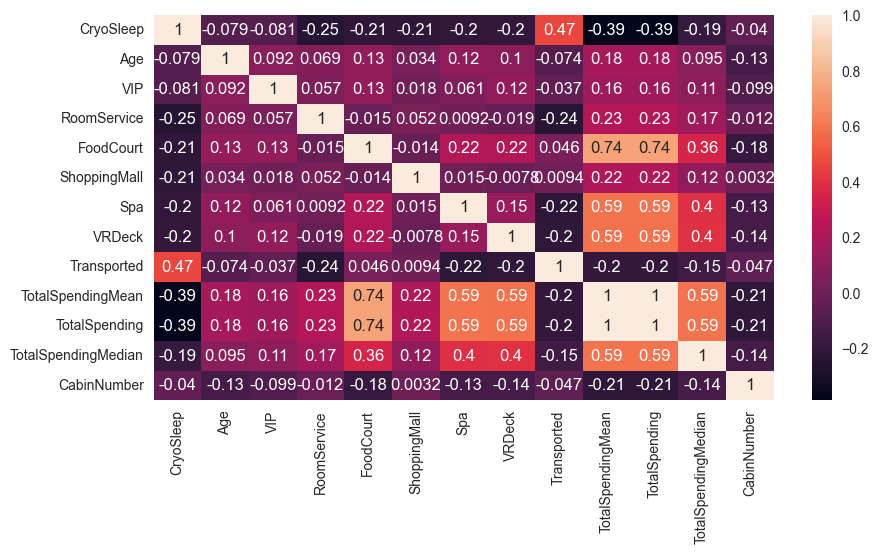

In [832]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.select_dtypes('number').corr(),annot=True)
plt.show()

In [833]:
# # Membuat pairplot
# sns.pairplot(train_df, hue='Transported', palette={True: 'blue', False: 'red'}, markers=["o", "s"])

# # Menambahkan judul
# plt.suptitle('Pairplot berdasarkan Transported', y=1.02)
# plt.show()

In [834]:
# # Membuat scatter plot menggunakan seaborn
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=train_df, x='Spa', y='Spa', hue='Transported', palette={True: 'blue', False: 'red'}, style='Transported')

# # Menambahkan label dan judul
# plt.xlabel('VRDeck')
# plt.ylabel('Spa')
# plt.title('Scatter Plot antara VRDeck dan Spa berdasarkan Transported')
# plt.legend(title='Transported')
# plt.grid(True)

# plt.show()

In [835]:
train_df['CabinNumber'] = pd.to_numeric(train_df['CabinNumber'], errors='coerce')  # Konversi ke numerik
train_df['CabinDeck'] = train_df['CabinDeck'].astype(str)  # Pastikan CabinDeck adalah string
train_df['CabinSide'] = train_df['CabinSide'].astype(str)  # Pastikan CabinSide adalah string

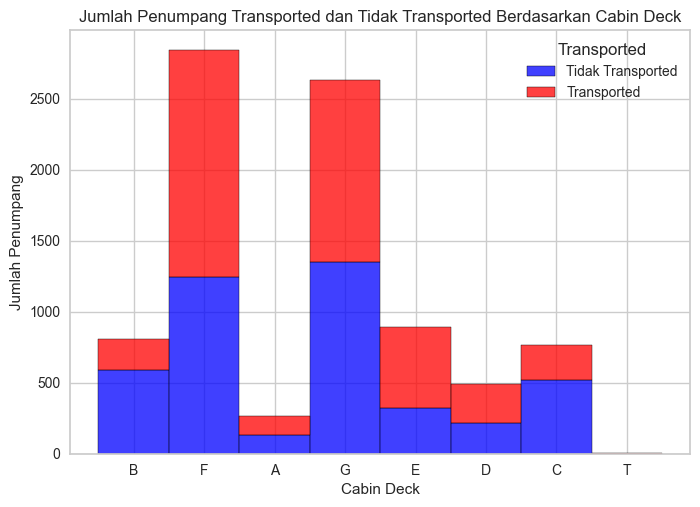

In [866]:
# Plot histogram untuk CabinDeck
sns.histplot(data=train_df, x='CabinDeck', hue='Transported', multiple='stack', discrete=True, palette={True: 'blue', False: 'red'})

# Menambahkan label dan judul
plt.xlabel('Cabin Deck')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Transported dan Tidak Transported Berdasarkan Cabin Deck')
plt.legend(title='Transported', labels=['Tidak Transported', 'Transported'])
plt.grid(True)
plt.show()  

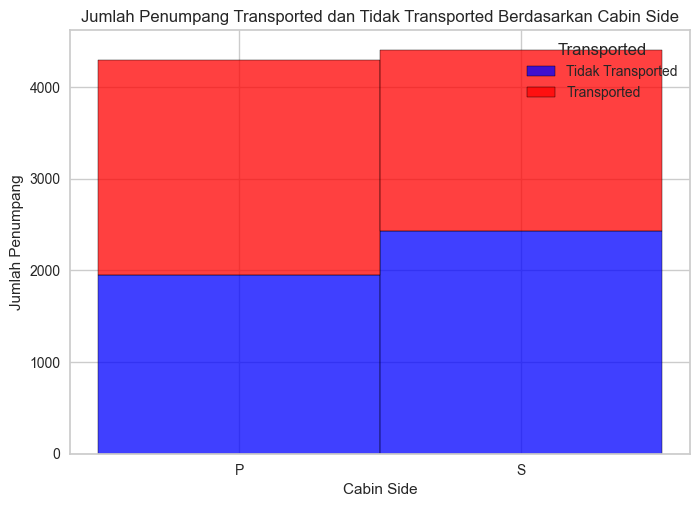

In [867]:
# Plot histogram untuk CabinSide
sns.histplot(data=train_df, x='CabinSide', hue='Transported', multiple='stack', discrete=True, palette={True: 'blue', False: 'red'})

# Menambahkan label dan judul
plt.xlabel('Cabin Side')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Transported dan Tidak Transported Berdasarkan Cabin Side')
plt.legend(title='Transported', labels=['Tidak Transported', 'Transported'])
plt.grid(True)
plt.show()

In [870]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,group,TotalSpendingMean,TotalSpending,TotalSpendingMedian,Family Name,Related Family,CabinDeck,CabinNumber,CabinSide,AgeGroup
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,0001,0.0,0.0,0.0,Ofracculy,Ofracculy-0001,B,0,P,Adult
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,0002,147.2,736.0,44.0,Vines,Vines-0002,F,0,S,Adult
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,0003,2076.6,10383.0,49.0,Susent,Susent-0003,A,0,S,Adult
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,0003,1035.2,5176.0,371.0,Susent,Susent-0003,A,0,S,Adult
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,0004,218.2,1091.0,151.0,Santantines,Santantines-0004,F,1,S,Child


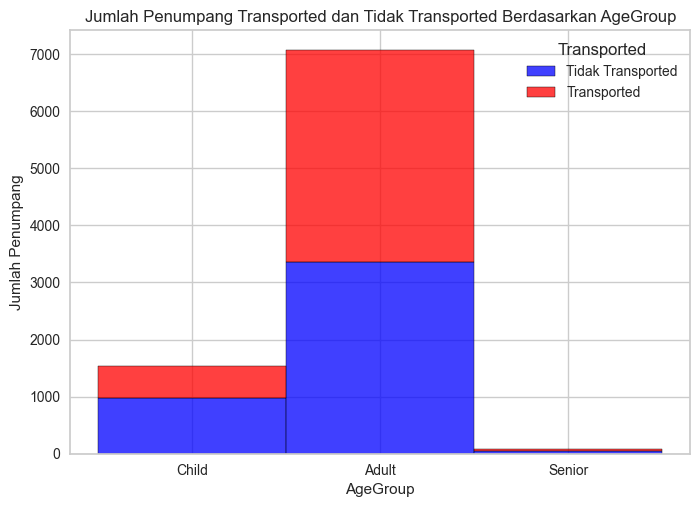

In [871]:
# Plot histogram untuk CabinDeck
sns.histplot(data=train_df, x='AgeGroup', hue='Transported', multiple='stack', discrete=True, palette={True: 'blue', False: 'red'})

# Menambahkan label dan judul
plt.xlabel('AgeGroup')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Transported dan Tidak Transported Berdasarkan AgeGroup')
plt.legend(title='Transported', labels=['Tidak Transported', 'Transported'])
plt.grid(True)
plt.show()  

### DATA PREPARATION

In [882]:
train_df_copy = train_df.copy()

In [883]:
train_df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,group,TotalSpendingMean,TotalSpending,TotalSpendingMedian,Family Name,Related Family,CabinDeck,CabinNumber,CabinSide,AgeGroup
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,0001,0.0,0.0,0.0,Ofracculy,Ofracculy-0001,B,0,P,Adult
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,0002,147.2,736.0,44.0,Vines,Vines-0002,F,0,S,Adult
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,0003,2076.6,10383.0,49.0,Susent,Susent-0003,A,0,S,Adult
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,0003,1035.2,5176.0,371.0,Susent,Susent-0003,A,0,S,Adult
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,0004,218.2,1091.0,151.0,Santantines,Santantines-0004,F,1,S,Child


In [884]:
train_df_copy.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpendingMean,TotalSpending,TotalSpendingMedian,CabinNumber
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.360635,28.728517,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624,288.431805,1440.866329,66.191361,597.433452
std,0.480212,14.355438,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016,561.099918,2803.045694,261.849276,510.515305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,166.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,143.400000,716.000000,0.000000,424.000000
75%,1.000000,37.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000,288.400000,1441.000000,19.000000,991.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,7197.400000,35987.000000,6103.000000,1894.000000


In [885]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Membuat instance LabelEncoder
le = LabelEncoder()

# Label encoding untuk kolom 'CabinDeck'
train_df_copy['CabinDeck Encoded'] = le.fit_transform(train_df_copy['CabinDeck'])
# Label encoding untuk kolom 'Family Name'
train_df_copy['Related Family Encoded'] = le.fit_transform(train_df_copy['Related Family'])
train_df_copy['AgeGroup Encoded'] = le.fit_transform(train_df_copy['AgeGroup'])

In [886]:
# Standarisasi kolom numerik
scaler = MinMaxScaler()
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpendingMean','TotalSpending','TotalSpendingMedian']
train_df_copy[numerical_columns] = scaler.fit_transform(train_df_copy[numerical_columns])

# Membuat instance LabelEncoder
le = LabelEncoder()

# Label encoding untuk kolom 'CabinDeck'
train_df_copy['CabinDeck Encoded'] = le.fit_transform(train_df_copy['CabinDeck'])

# Label encoding untuk kolom 'CabinSide'
# train_df_copy['CabinSide Encoded'] = le.fit_transform(train_df_copy['CabinSide'])

In [887]:
# One-hot encoding untuk kolom 'HomePlanet' dan 'Destination'
# train_df_copy = pd.get_dummies(train_df_copy, columns=['HomePlanet', 'Destination'])
# Label encoding untuk kolom 'CabinSide'
train_df_copy = pd.get_dummies(train_df_copy, columns=['CabinSide'])

In [908]:
# Hitung frekuensi label di kolom HomePlanet
homeplanet_counts = train_df_copy['HomePlanet'].value_counts()
homeplanet_mapping = {label: idx for idx, label in enumerate(homeplanet_counts.index)}

# Hitung frekuensi label di kolom Destination
destination_counts = train_df_copy['Destination'].value_counts()
destination_mapping = {label: idx for idx, label in enumerate(destination_counts.index)}

# Encode kolom berdasarkan mapping
train_df_copy['HomePlanetEncoded'] = train_df_copy['HomePlanet'].map(homeplanet_mapping)
train_df_copy['DestinationEncoded'] = train_df_copy['Destination'].map(destination_mapping)

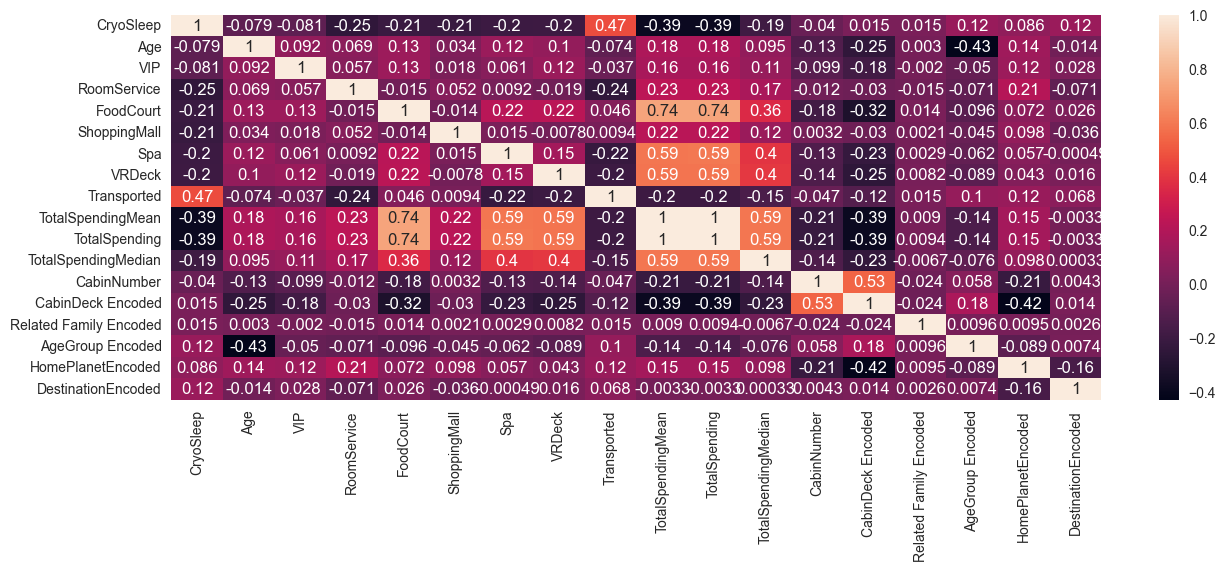

In [909]:
plt.figure(figsize=(15,5))
sns.heatmap(train_df_copy.select_dtypes('number').corr(),annot=True)
plt.show()

<Axes: >

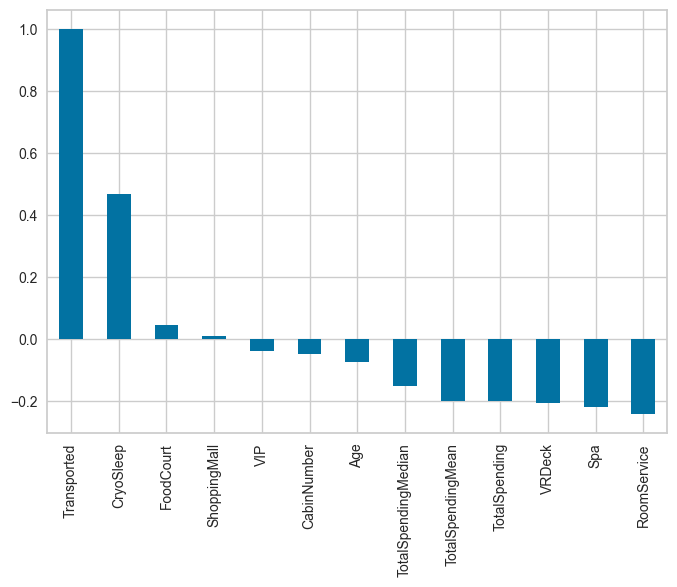

In [845]:
train_df.select_dtypes('number').corr()['Transported'].sort_values(ascending=False).plot(kind='bar')

In [910]:
train_df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinDeck,CabinNumber,AgeGroup,CabinDeck Encoded,Related Family Encoded,AgeGroup Encoded,CabinSide_P,CabinSide_S,HomePlanetEncoded,DestinationEncoded
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,0.493671,0,0.000000,0.000000,0.000000,...,B,0,Adult,1,4321,0,True,False,1,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,0.303797,0,0.007608,0.000302,0.001064,...,F,0,Adult,5,6135,0,False,True,0,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,0.734177,1,0.003001,0.119948,0.000000,...,A,0,Adult,0,5808,0,False,True,1,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,0.417722,0,0.000000,0.043035,0.015793,...,A,0,Adult,0,5808,0,False,True,1,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,0.202532,0,0.021149,0.002348,0.006428,...,F,1,Child,5,5261,1,False,True,0,0


In [911]:
train_df_copy.columns.to_list()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported',
 'group',
 'TotalSpendingMean',
 'TotalSpending',
 'TotalSpendingMedian',
 'Family Name',
 'Related Family',
 'CabinDeck',
 'CabinNumber',
 'AgeGroup',
 'CabinDeck Encoded',
 'Related Family Encoded',
 'AgeGroup Encoded',
 'CabinSide_P',
 'CabinSide_S',
 'HomePlanetEncoded',
 'DestinationEncoded']

In [926]:
train_df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinDeck,CabinNumber,AgeGroup,CabinDeck Encoded,Related Family Encoded,AgeGroup Encoded,CabinSide_P,CabinSide_S,HomePlanetEncoded,DestinationEncoded
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,0.493671,0,0.000000,0.000000,0.000000,...,B,0,Adult,1,4321,0,True,False,1,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,0.303797,0,0.007608,0.000302,0.001064,...,F,0,Adult,5,6135,0,False,True,0,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,0.734177,1,0.003001,0.119948,0.000000,...,A,0,Adult,0,5808,0,False,True,1,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,0.417722,0,0.000000,0.043035,0.015793,...,A,0,Adult,0,5808,0,False,True,1,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,0.202532,0,0.021149,0.002348,0.006428,...,F,1,Child,5,5261,1,False,True,0,0


In [928]:
ready_to_train = train_df_copy.drop(columns=['PassengerId','Cabin','Name','group','Family Name','Destination','HomePlanet','Related Family','CabinDeck','TotalSpending','TotalSpendingMedian','AgeGroup','AgeGroup Encoded'])

In [930]:
ready_to_train = ready_to_train.astype('float')

In [931]:
ready_to_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpendingMean,CabinNumber,CabinDeck Encoded,Related Family Encoded,CabinSide_P,CabinSide_S,HomePlanetEncoded,DestinationEncoded
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,4321.0,1.0,0.0,1.0,0.0
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.020452,0.0,5.0,6135.0,0.0,1.0,0.0,0.0
2,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.288521,0.0,0.0,5808.0,0.0,1.0,1.0,0.0
3,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.143830,0.0,0.0,5808.0,0.0,1.0,1.0,0.0
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.030317,1.0,5.0,5261.0,0.0,1.0,0.0,0.0


In [932]:
ready_to_train.dropna(inplace=True)
print(ready_to_train.columns)
print(ready_to_train.isnull().sum())
print(ready_to_train.shape)

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'TotalSpendingMean', 'CabinNumber',
       'CabinDeck Encoded', 'Related Family Encoded', 'CabinSide_P',
       'CabinSide_S', 'HomePlanetEncoded', 'DestinationEncoded'],
      dtype='object')
CryoSleep                 0
Age                       0
VIP                       0
RoomService               0
FoodCourt                 0
ShoppingMall              0
Spa                       0
VRDeck                    0
Transported               0
TotalSpendingMean         0
CabinNumber               0
CabinDeck Encoded         0
Related Family Encoded    0
CabinSide_P               0
CabinSide_S               0
HomePlanetEncoded         0
DestinationEncoded        0
dtype: int64
(8693, 17)


### PCA

In [918]:
from sklearn.decomposition import PCA

In [939]:
# Mengaplikasikan PCA
pca = PCA(n_components=6)  # mengurangi ke 2 komponen utama untuk visualisasi
principal_components = pca.fit_transform(ready_to_train)

# Membuat DataFrame hasil PCA
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5','Principal Component 6'])
pca_df['Transported'] = ready_to_train['Transported'].values

In [940]:
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Transported
0,-1047.918424,-590.261777,-2.126291,-0.087276,-0.958794,-0.650651,0.0
1,-2861.875632,-577.806694,1.961504,-0.224022,0.639469,-0.520458,1.0
2,-2534.883450,-580.060165,-3.118259,-0.489472,0.335056,-1.005357,0.0
3,-2534.883450,-580.060113,-3.091201,-0.490436,0.344654,-0.992574,0.0
4,-1987.889347,-582.803990,1.951990,-0.225998,0.646974,-0.517339,1.0
...,...,...,...,...,...,...,...
8688,-1008.246907,-492.533768,-3.286415,-0.810315,-1.015663,-0.035677,0.0
8689,-767.638780,906.857081,0.166605,-1.169345,0.655575,0.999039,0.0
8690,1824.307059,890.071060,0.049386,-0.206833,0.753113,-0.464733,1.0
8691,301.221967,8.499107,-0.377786,-0.212012,0.565311,0.041884,0.0


## MODEL TRAINING

In [ ]:
from pycaret.classification import *

In [941]:
# Setup PyCaret
clf_setup = setup(data=pca_df, target='Transported', verbose=True, session_id=123,use_gpu=False)

# Bandingkan model dan pilih yang terbaik
best_model = compare_models()

# Pelatihan model terbaik pada seluruh data
final_model = finalize_model(best_model)

,Description,Value
0,Session id,123
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 7)"
4,Transformed data shape,"(8693, 7)"
5,Transformed train set shape,"(6085, 7)"
6,Transformed test set shape,"(2608, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9975,0.9999,0.9997,0.9955,0.9976,0.9951,0.9951,0.9070
et,Extra Trees Classifier,0.9957,0.9999,0.9993,0.9922,0.9958,0.9915,0.9915,0.0460
lightgbm,Light Gradient Boosting Machine,0.9957,0.9999,0.9990,0.9926,0.9958,0.9915,0.9915,0.1450
rf,Random Forest Classifier,0.9949,0.9998,0.9990,0.9910,0.9950,0.9898,0.9899,0.1020
dt,Decision Tree Classifier,0.9867,0.9867,0.9892,0.9845,0.9868,0.9734,0.9734,0.0100
gbc,Gradient Boosting Classifier,0.9862,0.9987,0.9941,0.9788,0.9864,0.9724,0.9725,0.2010
ada,Ada Boost Classifier,0.9699,0.9945,0.9798,0.9614,0.9704,0.9398,0.9401,0.0600
nb,Naive Bayes,0.7489,0.8305,0.7240,0.7659,0.7441,0.4979,0.4990,0.0070
ridge,Ridge Classifier,0.7468,0.8393,0.7328,0.7575,0.7448,0.4936,0.4941,0.0110
lda,Linear Discriminant Analysis,0.7468,0.8393,0.7328,0.7575,0.7448,0.4936,0.4941,0.0060


In [901]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CryoSleep', 'Age', 'VIP',
                                             'RoomService', 'FoodCourt',
                                             'ShoppingMall', 'Spa', 'VRDeck',
                                             'TotalSpendingMean', 'CabinNumber',
                                             'CabinDeck Encoded',
                                             'Related Family Encoded',
                                             'AgeGroup Encoded'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=N...
                                    transformer=OneHotEncoder(cols=['AgeGroup'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x00000155466F4190>)],
         verbose=False)